In [5]:
"""IBMQトークンの読み込み"""
TOKEN_FILE = "token.txt"
with open(TOKEN_FILE, mode="r", encoding="ascii") as f:
    token = f.readline()

In [7]:
"""その他の準備"""
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

In [8]:
"""qiskitの準備"""
from qiskit import IBMQ

# トークンを使ってIBMQに接続する
# IBMQ.enable_account(token)
IBMQ.save_account(token)
IBMQ.load_account()

# IBMQプロバイダ（実機へのアクセスを管理するオブジェクト）
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

# バックエンド（実機）のうち量子ビット数2個以上のもののリストをプロバイダから取得し、一番空いているものを選ぶ
backend_filter = lambda b: (not b.configuration().simulator) and (b.configuration().n_qubits >= 2) and b.status().operational
backend = least_busy(provider.backends(filters=backend_filter))

print('Jobs will run on', backend.name())

configrc.store_credentials:WARNING:2021-05-06 03:45:23,012: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-05-06 03:45:23,592: Credentials are already in use. The existing account in the session will be replaced.
Jobs will run on ibmq_quito


In [10]:
"""量子回路の作成
"""
circuit = QuantumCircuit(2) # レジスタを介さずビット数を指定して回路を作成することもできます
circuit.h(0) # その場合、ゲートにはregister[0]ではなく直接量子ビットの番号を指定します
circuit.ry(np.pi / 2., 0) #　θ = π/2
circuit.x(0)
circuit.measure_all()

print('This circuit has', circuit.num_qubits, 'qubits and', circuit.size(), 'operations')

This circuit has 2 qubits and 5 operations


In [12]:
"""量子コンピューティングにジョブを投げる
IBMQにジョブを投げるので、不用意に何回も実行しないこと
"""
shots = 8192
job = execute(circuit, backend=backend, shots=shots)
job_monitor(job, interval=2)

Job Status: job has successfully run


In [13]:
"""量子測定結果の解析
ジョブの結果を表示する
"""
try:
    job
except NameError:
    # 過去に実行したジョブIDを使って結果を表示する
    # backend = provider.get_backend('ibm-q/open/main')
    job = backend.retrieve_job('6092e459541123be433f1b3e')

result = job.result()

counts = []
c = result.get_counts(circuit)
counts.append(c)
print(counts)

[{'00': 8039, '01': 102, '10': 50, '11': 1}]


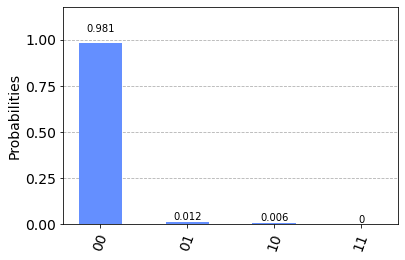

In [14]:
"""実行結果の可視化"""
for c in counts:
    ax = plt.figure().add_subplot()
    plot_histogram(c, ax=ax)